In [1]:
from google.colab import files
files=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
train_df = pd.read_csv('/content/train.csv', index_col="S.No")
train_df

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,LABELS
S.No,,,,,,,,,,,,,,,,,,,,
0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804,0
1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006,1
2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331,0
3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906,0
4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47755,-30.625815,353.4375,14.680613,3.153518,4.250256,-0.406992,3.480553,0.008333,102109.4844,102109.4844,213.804184,259.846222,2.470000e-09,291.791870,290.141663,177.677322,12058.16016,63.678669,20001106,2
47756,-24.993481,242.1875,29.540585,9.181329,-0.369805,7.125068,-5.466469,0.013645,101734.2813,101734.2813,213.867416,263.996307,2.620000e-09,296.322327,296.220642,150.108872,12272.25781,65.238327,20010712,2
47757,-30.625815,353.4375,20.991110,7.709649,-6.284292,3.702500,-7.359541,0.010529,101800.8516,101800.8516,216.394852,264.192566,4.240000e-09,290.757996,290.736847,152.666443,12232.26953,63.929737,20011029,0


In [47]:
print(train_df.shape)

(47760, 20)


In [48]:
test_df = pd.read_csv('/content/test.csv', index_col="S.No")

In [49]:
test_df

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
S.No,,,,,,,,,,,,,,,,,,,
0,-31.095176,353.1250,22.372244,-1.994936,-0.002513,-7.732825,-1.864900,0.008203,102809.6719,102809.6719,216.572952,258.135406,4.060000e-08,290.377930,289.014862,234.634003,12023.84082,63.400764,20130927
1,-31.095176,353.4375,21.536032,-2.058918,0.397359,-8.436489,-0.940275,0.007887,102816.6016,102816.6016,216.496490,258.205994,1.670000e-08,290.377228,288.873138,234.982056,12023.83301,63.348942,20130927
2,-31.095176,353.7500,20.465317,-2.128485,0.717785,-8.842417,0.152449,0.007695,102827.8594,102827.8594,216.268356,258.242279,1.220000e-08,290.377228,288.641480,235.631378,12025.41113,63.281322,20130927
3,-31.095176,354.0625,19.967148,-2.126235,1.123356,-8.773702,1.251795,0.007519,102830.5391,102830.5391,216.036041,258.335113,3.460000e-10,290.441406,288.420074,235.608460,12026.61426,63.216827,20130927
4,-31.095176,354.3750,19.598663,-2.053118,1.823581,-8.472447,2.225254,0.007293,102823.8516,102823.8516,215.934860,258.513702,5.920000e-10,290.468903,288.392975,235.004334,12027.29004,63.200485,20130927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,24.054759,276.5625,51.415295,-1.095974,-8.194263,2.484773,-10.520496,0.020928,100743.8438,100743.8438,221.118347,268.880676,6.870000e-15,302.576569,302.226227,66.832077,12467.79492,66.832077,20130916
7316,24.054759,276.8750,52.377407,-0.265653,-8.730537,3.783044,-10.748092,0.021389,100703.5313,100703.5313,221.193222,269.085083,9.240000e-10,302.583557,302.131012,66.827492,12466.41309,66.827492,20130916
7317,24.054759,277.1875,54.639217,0.775797,-9.646189,5.087689,-10.786784,0.021745,100673.9844,100673.9844,221.149490,269.305939,5.870000e-08,302.646820,302.032715,66.812981,12467.56934,66.812981,20130916


In [50]:
print(test_df.shape)

(7320, 19)


In [51]:
train_df.columns

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time', 'LABELS'],
      dtype='object')

In [52]:
attribute = train_df[['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time']]

# convert the attributes and the 'Labels' column to numpy array
attribute = attribute.to_numpy() 
result = train_df['LABELS'].to_numpy()
print(attribute.shape, result.shape)

(47760, 19) (47760,)


In [53]:
# Standardize the data 
def standardization(X):
    columns = X.shape[1]  
    for index in range(columns): 
        col = X[:, index]
        # Calculating mean standard deviation of each column
        average = col.mean() 
        standard = col.std() 
        # Calculating standard scaling for each of the element
        X[:, index] = (X[:, index] - average) / standard
        

In [54]:
# Attributes being standardized 
print(standardization(attribute)) 
# Standardization check - if its working 
columns = attribute.shape[1] 
for index in range(columns):
  print(attribute[:, index].std())

None
0.9999999999999998
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0


In [55]:
#weights creation
mass = np.zeros((3, 19))
#Biases creation
bias = np.zeros((3, 1))
print(mass.shape, bias.shape)

(3, 19) (3, 1)


In [56]:
# This is the linear predictor function
def Predictor(X, mass, bias):
    print(X.shape[0])
    # For each of the attribute, creating empty array
    Store = np.array([np.empty([3]) for index in range(X.shape[0])]) 
    print(Store.shape)
    for index in range(X.shape[0]): 
        # For each attribute create the logit vector using logit score. 
        Store[index] = (mass.dot(X[index].reshape(-1,1)) + bias).reshape(-1)  
    print(Store.shape)
    return Store

In [57]:
print(Predictor(attribute, mass, bias))

47760
(47760, 3)
(47760, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [58]:
StoreTest = Predictor(attribute, mass, bias)
StoreTest.shape

47760
(47760, 3)
(47760, 3)


(47760, 3)

In [59]:
# Conversion of scores to the values of probability 
def ProbabilityNormalizer(Matrix):
    # For each of the attribute, creating empty array
    prob = np.array([np.empty([3]) for index in range(Matrix.shape[0])])

    for index in range(Matrix.shape[0]):
        exponent = np.exp(Matrix[index]) 
        ArraySum = np.sum(exponent) 
        prob[index] = exponent/ArraySum 
    return prob
x = ProbabilityNormalizer(StoreTest)
print(x.shape)
print(x)

(47760, 3)
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [60]:
# Logistic Regression
def LogisticRegression(attribute, mass, bias):
    Store = Predictor(attribute, mass, bias)
    prob = ProbabilityNormalizer(Store)
    # Max Probabilities 
    predict = np.array([np.argmax(index) for index in prob]) 
    return prob, predict

In [61]:
prob, predict = LogisticRegression(attribute, mass, bias)
print(prob)
print(predict)

47760
(47760, 3)
(47760, 3)
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[0 0 0 ... 0 0 0]


In [62]:
# Get the accuracy of model
def accurate(predict, result):
    correctPrediction = 0
    for index in range(len(predict)):
        if predict[index] == result[index]:
            correctPrediction += 1
    accur = correctPrediction/len(predict)*100
    return accur

accur = accurate(predict, result)
print(accur)

78.59087102177554


In [63]:
def split_dataset(data, size = 0.25):
    #Dataframe to array
    Arrdata = data.to_numpy() 
    Rows = Arrdata.shape[0] 
    tRows = np.round(Rows * size) 
    randNum = np.random.randint(0, int(Rows), int(tRows)) 
    tData = np.array([Arrdata[i] for i in randNum]) 
    Arrdata = np.delete(Arrdata, randNum, axis = 0) 
    train_attributes = Arrdata[:, :-1]
    train_result = Arrdata[:, -1]
    test_attributes = tData[:, :-1]
    test_result = tData[:, -1]
    
    return train_attributes, train_result, test_attributes, test_result    

# running split_dataset
train_attributes, train_result, test_attributes, test_result = split_dataset(train_df, size = 0.25)
standardization(train_attributes) # standard scaling 
standardization(test_attributes) # standard scaling 
train_attributes.shape, train_result.shape, test_attributes.shape, test_result.shape, test_df.shape

((37181, 19), (37181,), (11940, 19), (11940,), (7320, 19))

In [64]:
# Cross Entropy Loss
def EntropyLoss(prob, result):
    samples = prob.shape[0]
    print("Samples", samples)
    loss = 0
    for s, index in zip(prob, result):
        loss += -np.log(s[index])
        # print("CELoss", CELoss)
    loss /= samples
    #print(CELoss)
    return loss 

In [65]:
# Stochastic Gradient Descent
def StochasticGradientDescent(rate, epo, result, attribute, mass, bias):
    result = result.astype(int)
    #empty array
    loss_lst = np.array([]) 
    
    
    for i in range(epo):
        prob, a = LogisticRegression(attribute,mass,bias)
        samples = prob.shape[0]
        
        loss = EntropyLoss(prob, result) 
        loss_lst = np.append(loss_lst, loss) 
        print(loss_lst)
        prob[np.arange(attribute.shape[0]),result] -= 1 
        
        weight = prob.T.dot(attribute)
        weight /= samples

        biases = np.sum(prob, axis = 0).reshape(-1,1) 
        biases /= samples

        #updating weights and biases
        mass -= (rate * weight)
        bias -= (rate * biases)

        testProb2, testPredict2 = LogisticRegression(np.array(test_attributes), mass, bias)
        
    return mass, bias, loss_lst

In [66]:
Weights, Biases, LossList = StochasticGradientDescent(0.1, 500, train_result,train_attributes, mass, bias)


Streaming output truncated to the last 5000 lines.
 0.43944961 0.43940855 0.43936772 0.43932709 0.43928667 0.43924647
 0.43920647 0.43916668 0.43912709 0.43908771 0.43904852 0.43900954
 0.43897076 0.43893217 0.43889378 0.43885558 0.43881758 0.43877977
 0.43874214 0.43870471 0.43866746 0.4386304  0.43859352 0.43855682
 0.43852031 0.43848398 0.43844782 0.43841184 0.43837604 0.43834041
 0.43830496 0.43826968 0.43823457 0.43819963 0.43816486 0.43813025
 0.43809581 0.43806154 0.43802743 0.43799348 0.4379597  0.43792607
 0.43789261 0.4378593  0.43782615 0.43779315 0.43776031 0.43772762
 0.43769509 0.4376627  0.43763047 0.43759839]
11940
(11940, 3)
(11940, 3)
37181
(37181, 3)
(37181, 3)
Samples 37181
[1.09861229 1.0494533  1.00919682 0.97444212 0.94346608 0.91536504
 0.88962615 0.86592497 0.84403134 0.82376533 0.80497654 0.78753411
 0.77132164 0.75623455 0.74217831 0.72906733 0.71682395 0.7053777
 0.69466457 0.68462635 0.67521009 0.66636759 0.6580549  0.65023193
 0.64286206 0.63591184 0.62935

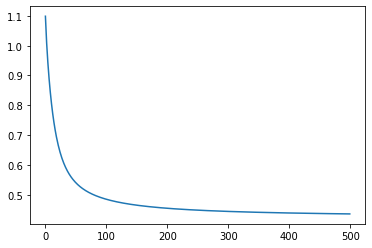

In [67]:
plt.plot(range(len(LossList)), LossList)

In [68]:
#for the submission to the kaggle on the test data set
test_df_predict = np.array(test_df)
standardization(test_df_predict)

In [69]:
testProbabilities1, testPredictions1 = LogisticRegression(np.array(test_df_predict), Weights, Biases)


7320
(7320, 3)
(7320, 3)


In [70]:
print(testPredictions1)

[0 0 0 ... 0 0 0]


In [40]:
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':testPredictions1})
# print(submission.LABELS)


# filename = 'Submission_Abhay_Scratch.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)